<a href="https://colab.research.google.com/github/Arghyajit-nic/Emotion-Classification-From-Text/blob/main/emotion_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Emotion Classification from Text
A logistic regression model to classify emotions based on text.

## 1. Install and Import Dependencies

In [1]:
#Setup & Imports
!pip install kagglehub --quiet
!pip install gradio --quiet

import pandas as pd
import matplotlib.pyplot as plt
import os
import joblib
import kagglehub
import gradio as gr

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


## 2. Download and Load Dataset

In [2]:
# Dataset from Kaggle using kagglehub
path = kagglehub.dataset_download("pashupatigupta/emotion-detection-from-text")

# List CSV file
csv_files = [f for f in os.listdir(path) if f.endswith(".csv")]
if not csv_files:
    raise FileNotFoundError("No CSV file found in the dataset.")
csv_path = os.path.join(path, csv_files[0])
print("Loaded CSV:", csv_path)

# Load into pandas
df = pd.read_csv(csv_path)
df.head()


100%|██████████| 1.56M/1.56M [00:00<00:00, 86.1MB/s]

Extracting files...
Loaded CSV: /root/.cache/kagglehub/datasets/pashupatigupta/emotion-detection-from-text/versions/1/tweet_emotions.csv


,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


## 3. Preprocessing and Train-Test Split

In [3]:
# Split dataset
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Extract features and labels
X_train = train_df['content']
y_train = train_df['sentiment']
X_test = test_df['content']
y_test = test_df['sentiment']


## 4. Vectorization and Model Training

In [4]:
# TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)


LogisticRegression(max_iter=1000)

## 5. Evaluation

In [5]:
y_pred = model.predict(X_test_vec)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.349
Classification Report:
               precision    recall  f1-score   support

       anger       0.00      0.00      0.00        19
     boredom       0.00      0.00      0.00        31
       empty       0.33      0.01      0.01       162
  enthusiasm       0.00      0.00      0.00       163
         fun       0.11      0.01      0.03       338
   happiness       0.34      0.38      0.36      1028
        hate       0.48      0.13      0.21       268
        love       0.49      0.39      0.44       762
     neutral       0.35      0.52      0.42      1740
      relief       0.38      0.03      0.05       352
     sadness       0.33      0.26      0.29      1046
    surprise       0.35      0.05      0.09       425
       worry       0.32      0.51      0.40      1666

    accuracy                           0.35      8000
   macro avg       0.27      0.18      0.18      8000
weighted avg       0.34      0.35      0.31      8000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## 6. Confusion Matrix

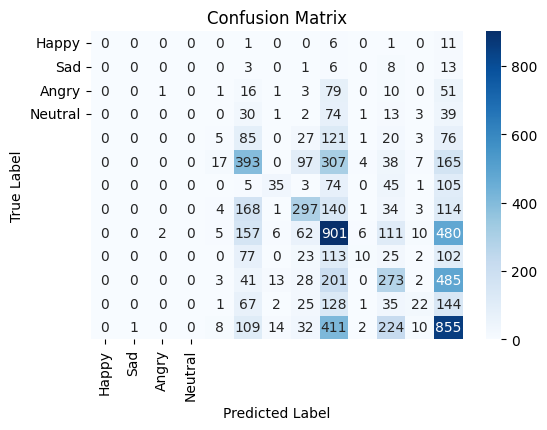

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

labels = ['Happy', 'Sad', 'Angry', 'Neutral']

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


## 7. Saving The Model and Vectorizer

In [7]:
joblib.dump(model, 'emotion_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

## 8. Defining Prediction Function

In [8]:
def predict_emotion(comment):
    vec = vectorizer.transform([comment])
    return model.predict(vec)[0]

# Example
print(predict_emotion("Scary lightning and thunder I'm glad it's over now"))


worry


## 9. Launching Gradio Interface

In [9]:
interface = gr.Interface(
    fn=predict_emotion,
    inputs=gr.Textbox(lines=3, placeholder="Type a comment here..."),
    outputs="text",
    title="Emotion Classifier",
    description="Enter a comment to classify the emotion (e.g. joy, fear, anger, etc.)"
)

interface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://92d187e59160e191b8.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
